## Exploratory Data Analysis [ EDA ] - Adult Dataset

In [901]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.style as style
import seaborn as sns 
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset 

In [903]:
data = pd.read_csv("adult.csv")

### Look at dataset first

In [905]:
data.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


**Observation :-**  The Dataset contains demographic, educational, and employment-related factors influence an individual’s income level

###  Find shape of the Dataset [ Number of Rows and Number of Columns ].

In [908]:
print('Shape of the dataset ::',data.shape)
print('Number of total Rows ::',data.shape[0])
print('Number of total Columns ::',data.shape[1])

Shape of the dataset :: (48842, 15)
Number of total Rows :: 48842
Number of total Columns :: 15


### Get information about the Dataset 

In [910]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


- Most columns are non-null
- Data types are appropriate for analysis
- No immediate missing value issue observed
- Most columns are numerical, while job-related fields are categorical.

### Check Null value for dataset

In [913]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

- Currently no null values in dataset

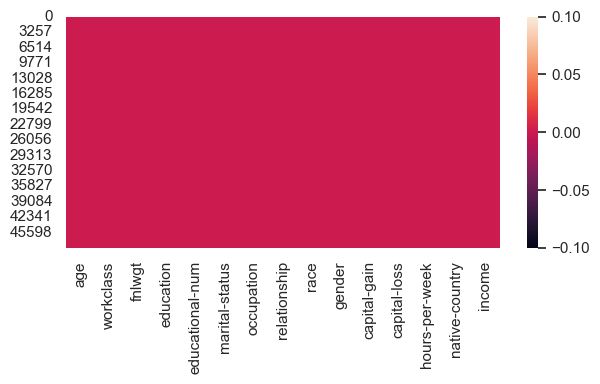

In [915]:
# Heatmap representation for null values in dataset.
plt.figure(figsize=(7,3))
sns.heatmap(data.isnull())
plt.show()

### Perform data cleaning [ Replace = ? with NaN ]
     In dataset certain column contain [ ? ] we can replace the with NaN 

In [917]:
data.isin(["?"]).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

- In dataset the feature contain [ ? ] ::
- workclass - 2799
- occupation - 2809
- native-country - 857


 

In [919]:
data['workclass'] = data['workclass'].replace("?",np.nan)
data['occupation'] = data['occupation'].replace("?",np.nan)
data['native-country'] = data['native-country'].replace("?",np.nan)

In [920]:
data.isin(["?"]).sum().any()

False

- All the [?] mark has been Handled 

In [922]:
# Now checking for null values 
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

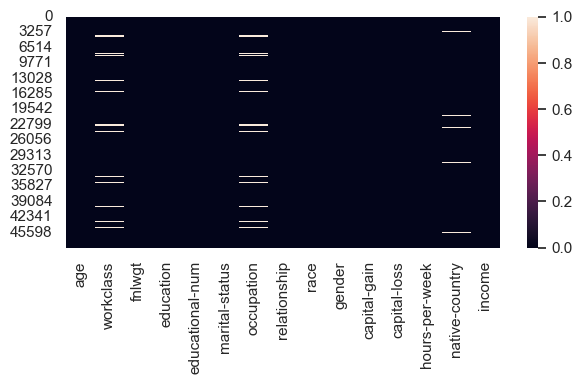

In [923]:
plt.figure(figsize=(7,3))
sns.heatmap(data.isnull())
plt.show()

### Handling Null Values 
     All this NaN values is in object type feature which can impute through mode() imputation 

In [925]:
data['occupation'] = data['occupation'].fillna(data['occupation'].mode())
data['occupation'] = data['occupation'].fillna(data['occupation'].mode())
data['occupation'] = data['occupation'].fillna(data['occupation'].mode())
data.isnull().sum().any()

True

- Now there is no missing or null values in dataset  

### Check for duplicate data and drop them.

In [928]:
data.drop_duplicates(inplace = True)
print(data.shape)

(48790, 15)


- Dataset contain some duplicate data which can handled 

###  Get overall statistics about the dataset.

In [931]:
data.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48790.000000,45995,4.879000e+04,48790,48790.000000,48790,45985,48790,48790,48790,48790.000000,48790.000000,48790.000000,47934,48790
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33860,NaN,15770,NaN,22366,6165,19703,41714,32614,NaN,NaN,NaN,43792,37109
mean,38.652798,NaN,1.896690e+05,NaN,10.078807,NaN,NaN,NaN,NaN,NaN,1080.217688,87.595573,40.425886,NaN,NaN
std,13.708493,NaN,1.056172e+05,NaN,2.570046,NaN,NaN,NaN,NaN,NaN,7455.905921,403.209129,12.392729,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175550e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781385e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376062e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### Drop column "educational-num","capital-gain" and "capital-loss". 
      These feature doesn't have that much impact on dataset and further EDA 

In [933]:
data = data.drop(['educational-num','capital-gain','capital-loss'],axis = 1)
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

### What is the Distribution of Age Column?

count    48790.000000
mean        38.652798
std         13.708493
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


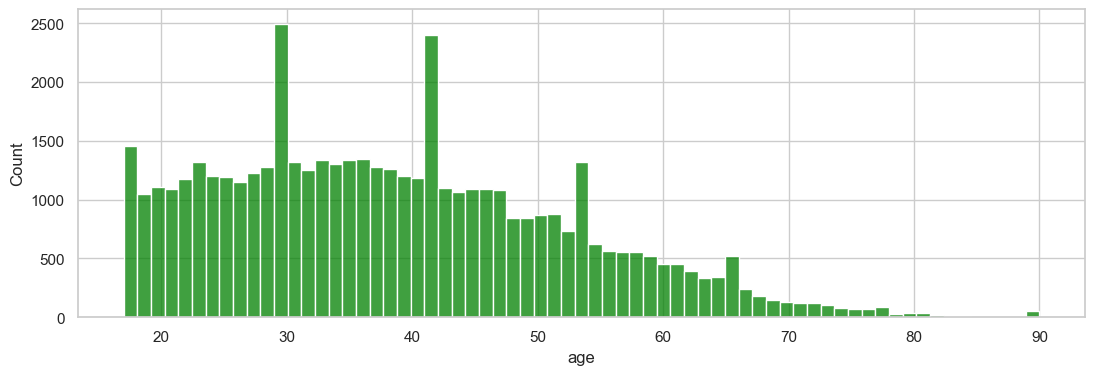

In [1077]:
print(data['age'].describe())
plt.figure(figsize=(13,4))
sns.histplot(data = data['age'],color='green')
plt.show()

### Find Total Number of Persons having Age between 17 to 48 (inclusive).

In [937]:
print("Total number of people having age between 17 to 48 ::",sum((data['age']>17) & (data['age']< 48)))

Total number of people having age between 17 to 48 :: 35833


-  length of dataset is 48790 out of that 35833 entries blongs to people ranging age from 17 to 48 which is major protion 

### What is the Distribution of Workclass Column?

count       45995
unique          8
top       Private
freq        33860
Name: workclass, dtype: object


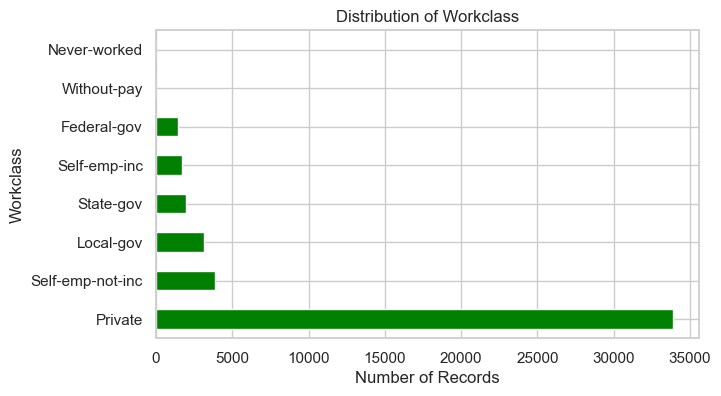

In [940]:
print(data['workclass'].describe())

# Count occurrences of each category
plt.figure(figsize=(7,4))
data['workclass'].value_counts().plot(kind='barh', color='green')
plt.title("Distribution of Workclass")
plt.xlabel("Number of Records")
plt.ylabel("Workclass")
plt.show()

- The Workclass feature contains 45,995 records distributed across 8 unique categories. 
- The most dominant category is Private, with a frequency of 33,860, which accounts for a large majority of the dataset.
- This indicates that the dataset is heavily skewed toward private-sector employees, while other workclasses (such as government, self-employed, etc.) are comparatively underrepresented.

### How many Persons have Bachelors or Masters Degree

In [943]:
data['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

People having Bachelors or Masters Degree :: 10669


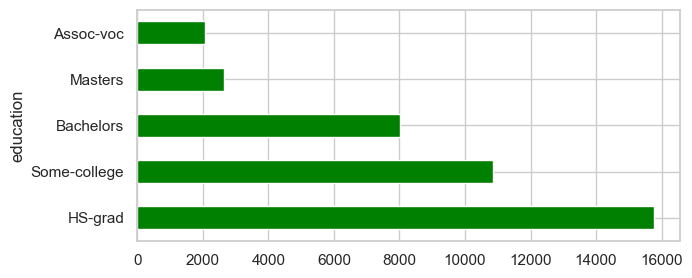

In [944]:
print("People having Bachelors or Masters Degree ::",sum((data['education']=='Bachelors') | (data['education']=='Masters')))
plt.figure(figsize=(7,3))
data['education'].value_counts().head(5).plot(kind='barh', color='green');

- Out of the total dataset, 10,669 individuals hold either a Bachelor’s or Master’s degree.
- This shows that a significant portion of the population has higher education, indicating a relatively strong presence of skilled and professionally qualified individuals in the dataset.  

### Plot the relation between Salary and Age using Boxplot.

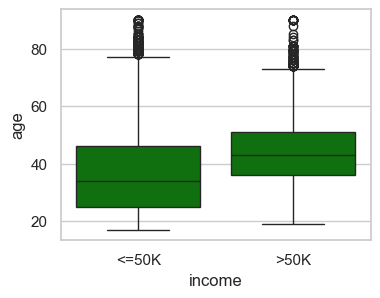

In [947]:
plt.figure(figsize=(4,3))
sns.boxplot(x= "income",y="age",data= data,color='green')
plt.show()

- Higher income [ >50K ] is more prevalent among older individuals, while lower income [ ≤50K ] is dominated by younger age groups, indicating a positive association between age and salary.

### Replace Salary values [ <=50K ]and [ >50K ] with 0 and 1.
    After converting the income variable into binary form (0 and 1), the data shows a clear relationship between age and income level:
       - Individuals with income = 1 (>50K) generally belong to higher age groups.
       - Individuals with income = 0 (≤50K) are more concentrated in younger age ranges.   

In [950]:
print(data['income'].unique())
data['income'] = data['income'].replace({"<=50K":0,">50K":1})  
data['income'].unique()

['<=50K' '>50K']


array([0, 1], dtype=int64)

### Which Workclass is getting the Highest Salary?

In [952]:
data['workclass'].unique()

array(['Private', 'Local-gov', nan, 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

workclass
Self-emp-inc        0.553719
Federal-gov         0.391760
Local-gov           0.295599
Self-emp-not-inc    0.278943
State-gov           0.267542
Private             0.217986
Without-pay         0.095238
Never-worked        0.000000
Name: income, dtype: float64


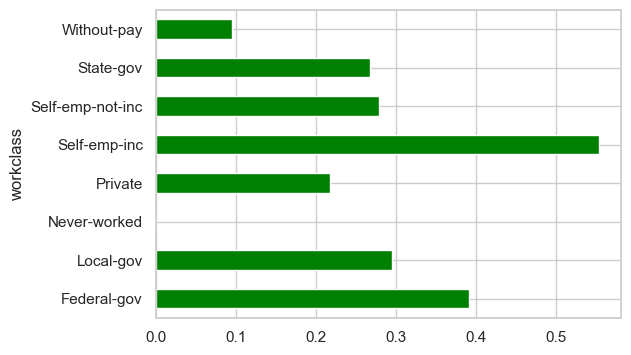

In [953]:
highest_salary = data.groupby('workclass')['income'].mean()
print(highest_salary.sort_values(ascending=False))
plt.figure(figsize=(6,4))
highest_salary.plot(kind='barh',color='green');

- Workclass significantly influences income.
- Incorporated self-employed individuals and federal government employees are more likely to earn higher salaries, while private-sector and unpaid roles show lower income levels.

### Who has a Better Chance to get Salary >50K [ Male or Female ]

In [956]:
data.groupby('gender')['income'].mean().round(2)

gender
Female    0.11
Male      0.30
Name: income, dtype: float64

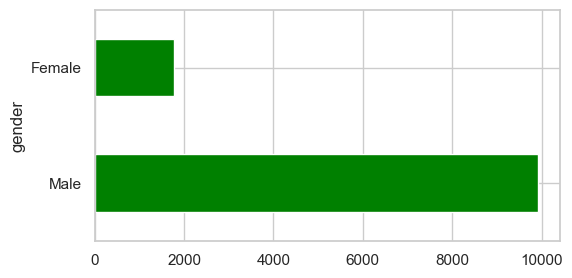

In [957]:
plt.figure(figsize=(6,3))
data[data['income']==1]['gender'].value_counts().plot(kind='barh',color='green');

- Amoung the individual males have higher chances to have income higher than 50k compared to females 

### Convert Workclass Column’s Datatype to Category Datatype.

In [990]:
data['workclass']= data['workclass'].astype('category')
print(data['workclass'].info())

<class 'pandas.core.series.Series'>
Index: 48790 entries, 0 to 48841
Series name: workclass
Non-Null Count  Dtype   
--------------  -----   
45995 non-null  category
dtypes: category(1)
memory usage: 429.2 KB
None


In [992]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48790 non-null  int64   
 1   workclass       45995 non-null  category
 2   fnlwgt          48790 non-null  int64   
 3   education       48790 non-null  object  
 4   marital-status  48790 non-null  object  
 5   occupation      45985 non-null  object  
 6   relationship    48790 non-null  object  
 7   race            48790 non-null  object  
 8   gender          48790 non-null  object  
 9   hours-per-week  48790 non-null  int64   
 10  native-country  47934 non-null  object  
 11  income          48790 non-null  int64   
dtypes: category(1), int64(4), object(7)
memory usage: 4.5+ MB


### Does relationship status influence income?

relationship
Wife              0.468897
Husband           0.448663
Not-in-family     0.101617
Unmarried         0.060304
Other-relative    0.034529
Own-child         0.014665
Name: income, dtype: float64


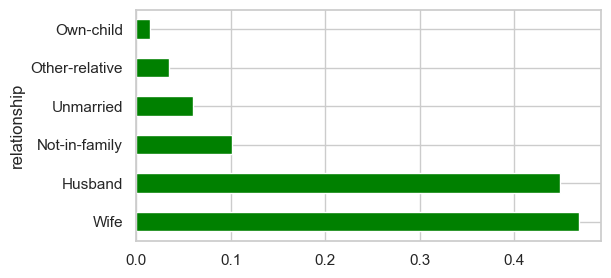

In [1109]:
# Mean income by relationship
relationship_income = data.groupby('relationship')['income'].mean().sort_values(ascending=False)
print(relationship_income)
plt.figure(figsize=(6,3))
relationship_income.plot(kind='barh',color='green');

- Relationship status does influence income.
- Being married (Husband/Wife) is strongly associated with higher income levels, while individuals who are unmarried or dependents are far less likely to earn above 50K.

### Are married individuals more likely to earn higher income?

marital-status
Married-civ-spouse       0.446124
Married-AF-spouse        0.378378
Divorced                 0.101207
Married-spouse-absent    0.092504
Widowed                  0.084321
Separated                0.064706
Never-married            0.045579
Name: income, dtype: float64


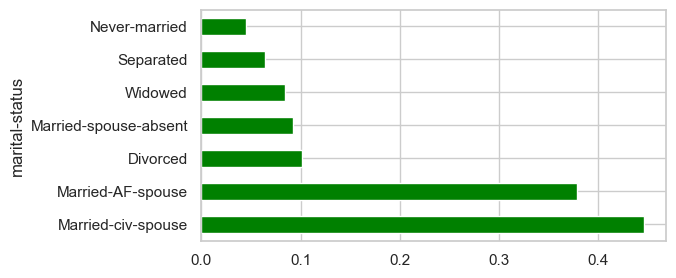

In [1107]:
# Mean income by marital status
marital_income = data.groupby('marital-status')['income'].mean().sort_values(ascending=False)
print(marital_income)
plt.figure(figsize=(6,3))
marital_income.plot(kind='barh',color='green');

- Marital and relationship status strongly influence income, with married individuals especially spouses—showing the highest likelihood of earning above 50K. 

### Do individuals from certain countries earn higher income ?

native-country
France        0.421053
India         0.410596
Taiwan        0.400000
Iran          0.372881
England       0.370079
Greece        0.367347
Yugoslavia    0.347826
Japan         0.347826
Canada        0.346154
Italy         0.323810
Name: income, dtype: float64


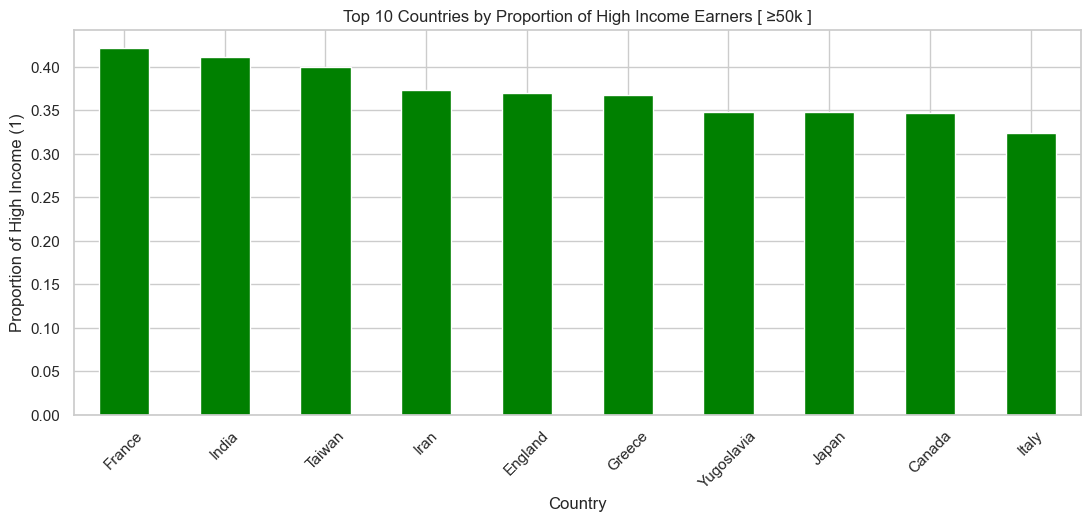

In [1082]:
country_income = ( data.groupby('native-country')['income'] .mean().sort_values(ascending=False))
print(country_income.head(10))
plt.figure(figsize=(13,5))
country_income.head(10).plot(kind='bar',color='green')
plt.title("Top 10 Countries by Proportion of High Income Earners [ ≥50k ]")
plt.xlabel("Country")
plt.ylabel("Proportion of High Income (1)")
plt.xticks(rotation=45)
plt.show()

- The individuals from certain countries such as France, India, and Taiwan are more likely to earn higher income in this dataset, suggesting a meaningful relationship between native country and income level.

In [1094]:
combo_income = (
    data
    .groupby(['education', 'occupation', 'workclass'])['income']
    .mean()
    .sort_values(ascending=False)
)
combo_income.head(5)

education    occupation         workclass       
Bachelors    Protective-serv    Self-emp-inc        1.0
Assoc-acdm   Machine-op-inspct  Self-emp-not-inc    1.0
9th          Machine-op-inspct  Federal-gov         1.0
12th         Protective-serv    Federal-gov         1.0
Prof-school  Transport-moving   Private             1.0
Name: income, dtype: float64

- Income is not driven by education alone. 
- The combination of education, occupation, and workclass plays a critical role, and in certain aligned cases, it results in consistently higher earnings.